In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.metrics import mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.linear_model import Ridge,Lasso,ElasticNet #正則化項付き最小二乗法を行うためのライブラリ
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
#データインポート
df_prj = pd.read_csv("../1_data/ks-projects-201801.csv")
display(df_prj.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
#ID                     プロジェクトID
#name                   プロジェクト名
#category               プロジェクトのカテゴリ
#main_category          プロジェクトのメインカテゴリー
#currency               通貨
#deadline               プロジェクト納期
#goal                   目標金額
#launched               プロジェクト開始日
#pledged                確定した金額
#state                  ステータス
#backers                後援者
#country                国
#usd pledged         使った金額
#usd_pledged_real       実際に獲得した金額
#usd_goal_real          実際の目標金額

In [4]:
cat = df_prj['category'].value_counts()
print(cat)

Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction               9169
Fashion               8554
Nonfiction            8318
Art                   8253
Apparel               7166
Theater               7057
Technology            6930
Rock                  6758
Children's Books      6756
Apps                  6345
Publishing            6018
Webseries             5762
Photography           5752
Indie Rock            5657
Narrative Film        5188
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3912
Hardware              3663
                     ...  
Couture                275
Blues                  268
Animals                255
Fabrication Tools      250
Printing               238
Makerspaces            238
M

In [5]:
maincat = df_prj['main_category'].value_counts()
print(maincat)

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64


In [6]:
country = df_prj['country'].value_counts()
print(country)

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64


In [7]:
currency = df_prj['currency'].value_counts()
print(currency)

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64


In [8]:
state = df_prj['state'].value_counts()
print(state)

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64


In [9]:
df_prj.shape

(378661, 15)

In [10]:
#統計量算出
df_prj.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [11]:
#欠損値確認
df_prj.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [12]:
#usd pledgedをゼロ埋め
df_prj['usd pledged'] = df_prj['usd pledged'].fillna(0)
df_prj.isnull().sum()

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [13]:
df_prj.shape

(378661, 15)

In [14]:
#deadlineとlaunchedの差分計算
df_prj['deadline'] = pd.to_datetime(df_prj['deadline'],format='%Y-%m-%d')
df_prj['launched'] = pd.to_datetime(df_prj['launched'],format='%Y-%m-%d')

df_prj['terms'] = (df_prj['deadline'] - df_prj['launched']).astype('timedelta64[D]')
terms = df_prj['terms'].value_counts()
print(terms)

29.0       169171
59.0        33623
44.0        17749
30.0        13261
34.0        10099
39.0        10039
31.0         7294
19.0         6831
20.0         6716
28.0         6192
24.0         6139
32.0         5775
27.0         5466
14.0         5379
13.0         4176
33.0         3617
35.0         3431
26.0         2943
21.0         2709
49.0         2645
25.0         2629
36.0         2586
23.0         2547
9.0          2301
22.0         2258
37.0         2195
45.0         2022
41.0         2012
38.0         1933
58.0         1888
            ...  
0.0           102
74.0           95
63.0           90
75.0           87
70.0           87
71.0           82
66.0           78
85.0           73
79.0           69
67.0           67
86.0           67
68.0           66
84.0           60
83.0           57
72.0           56
77.0           55
80.0           55
82.0           54
81.0           54
76.0           52
73.0           46
78.0           39
91.0           22
16738.0         1
14732.0   

In [15]:
df_prj.shape

(378661, 16)

In [15]:
#stateを数値化

#failed        197719　⇒0
#successful    133956　⇒1
#canceled       38779　⇒一旦除外
#undefined       3562　⇒除外
#live            2799　⇒除外
#suspended       1846　⇒一旦除外

df_prj['state'] = df_prj['state'].map({'failed': 0, 'successful': 1})
df_prj.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,terms
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0.0,0,GB,0.0,0.0,1533.95,58.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0.0,15,US,100.0,2421.0,30000.00,59.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0.0,3,US,220.0,220.0,45000.00,44.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0.0,1,US,1.0,1.0,5000.00,29.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,NaN,14,US,1283.0,1283.0,19500.00,55.0


In [16]:
#欠損値確認
df_prj.isnull().sum()

ID                      0
name                    4
category                0
main_category           0
currency                0
deadline                0
goal                    0
launched                0
pledged                 0
state               46986
backers                 0
country                 0
usd pledged             0
usd_pledged_real        0
usd_goal_real           0
terms                   0
dtype: int64

In [17]:
#stateの欠損値の行を除く
df_prj_nnan = df_prj.dropna(subset=['state'])

In [18]:
df_prj_nnan.shape

(331675, 16)

In [19]:
state = df_prj_nnan['state'].value_counts()
print(state)

0.0    197719
1.0    133956
Name: state, dtype: int64


In [20]:
#カテゴリーを数値化
df_ctg = pd.get_dummies(df_prj_nnan,columns=['main_category','country'])
df_ctg.head()

,ID,name,category,currency,deadline,goal,launched,pledged,state,backers,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000002330,The Songs of Adelaide & Abullah,Poetry,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0.0,15,...,0,0,0,0,0,0,0,0,0,1
2,1000004038,Where is Hank?,Narrative Film,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0.0,3,...,0,0,0,0,0,0,0,0,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
5,1000014025,Monarch Espresso Bar,Restaurants,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1.0,224,...,0,0,0,0,0,0,0,0,0,1


In [21]:
#欠損値確認
df_ctg.isnull().sum()

ID                            0
name                          3
category                      0
currency                      0
deadline                      0
goal                          0
launched                      0
pledged                       0
state                         0
backers                       0
usd pledged                   0
usd_pledged_real              0
usd_goal_real                 0
terms                         0
main_category_Art             0
main_category_Comics          0
main_category_Crafts          0
main_category_Dance           0
main_category_Design          0
main_category_Fashion         0
main_category_Film & Video    0
main_category_Food            0
main_category_Games           0
main_category_Journalism      0
main_category_Music           0
main_category_Photography     0
main_category_Publishing      0
main_category_Technology      0
main_category_Theater         0
country_AT                    0
country_AU                    0
country_

In [ ]:
#散布図
pd.plotting.scatter_matrix(df_ctg, figsize=(10,10))
plt.show()

In [22]:
# 相関係数確認
df_ctg.corr()

,ID,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,terms,main_category_Art,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
ID,1.000000,0.001900,0.000852,-0.000722,0.000838,-0.000287,0.000287,0.001844,0.002816,0.000526,...,0.001104,-0.001367,-0.000234,-0.001151,0.000363,0.001755,-0.000757,-0.000844,0.000675,0.002805
goal,0.001900,1.000000,0.007965,-0.025099,0.004794,0.006417,0.005955,0.952614,0.022692,-0.000864,...,0.010552,-0.000159,0.013077,-0.000518,0.001178,0.012109,-0.000711,0.016745,-0.000783,-0.008454
pledged,0.000852,0.007965,1.000000,0.109507,0.717316,0.857009,0.953571,0.005722,0.008115,-0.019101,...,0.033425,-0.000474,0.012415,0.001285,-0.000116,0.010073,-0.001461,0.039280,0.002011,-0.001937
state,-0.000722,-0.025099,0.109507,1.000000,0.125790,0.095614,0.108298,-0.023735,-0.116437,0.026554,...,-0.001689,-0.001885,-0.016415,0.004931,-0.025805,-0.010726,-0.006610,-0.009172,-0.000891,0.056250
backers,0.000838,0.004794,0.717316,0.125790,1.000000,0.697495,0.752291,0.005208,-0.000050,-0.021275,...,-0.000625,-0.000858,-0.006010,-0.003034,-0.002210,-0.003220,-0.002457,-0.000760,0.001082,0.012707
usd pledged,-0.000287,0.006417,0.857009,0.095614,0.697495,1.000000,0.906596,0.006966,0.007723,-0.017193,...,-0.000676,-0.000688,-0.005908,-0.002324,-0.002631,-0.002446,-0.002873,-0.002837,-0.002166,0.015208
usd_pledged_real,0.000287,0.005955,0.953571,0.108298,0.752291,0.906596,1.000000,0.006354,0.008651,-0.019359,...,-0.000539,-0.000274,-0.005666,0.001462,0.001571,-0.002487,-0.002572,-0.001227,0.000631,0.010733
usd_goal_real,0.001844,0.952614,0.005722,-0.023735,0.005208,0.006966,0.006354,1.000000,0.021607,-0.000542,...,-0.000215,-0.000090,-0.001605,-0.000473,0.002215,0.000104,-0.000977,-0.000167,-0.000889,-0.003756
terms,0.002816,0.022692,0.008115,-0.116437,-0.000050,0.007723,0.008651,0.021607,1.000000,-0.036935,...,-0.003417,0.002037,0.013080,-0.003276,-0.004459,0.002682,-0.012681,-0.003591,-0.005289,0.035199
main_category_Art,0.000526,-0.000864,-0.019101,0.026554,-0.021275,-0.017193,-0.019359,-0.000542,-0.036935,1.000000,...,-0.001055,-0.000350,0.005016,-0.007286,-0.003108,-0.003774,-0.003192,-0.001955,-0.004610,0.006736


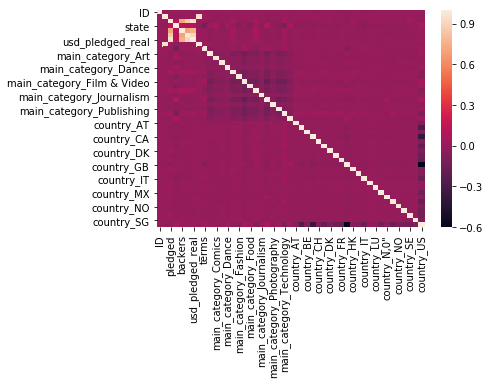

In [23]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_ctg.corr())
plt.show()

In [25]:
#説明変数選定

#ID                     プロジェクトID　　⇒不要
#name                   プロジェクト名　　⇒不要
#category               プロジェクトのカテゴリ　⇒不要
#main_category          プロジェクトのメインカテゴリー　⇒必要
#currency               通貨　　⇒不要
#deadline               プロジェクト納期　⇒不要
#goal                   目標金額　　⇒必要
#launched               プロジェクト開始日　⇒不要
#pledged                確定した金額　⇒必要　⇒不要
#state                  ステータス　⇒不要（目的変数）
#backers                後援者　　⇒必要
#country                国　　　⇒必要
#usd pledged         使った金額　　⇒不要
#usd_pledged_real       実際に獲得した金額　⇒不要
#usd_goal_real          実際の目標金額　　⇒不要
#terms　　　　　　　　　プロジェクト期間　⇒必要

In [26]:
#予測

#不要な説明変数を省く
drop_col = ['state', 'ID', 'name', 'category', 'currency','deadline','launched','pledged']

y = df_ctg["state"].values
X = df_ctg.drop(drop_col,axis=1).values

#print(X)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
w5 = clf.coef_[0, 4]
#w6 = clf.coef_[0, 5]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f} ".format(w0, w1, w2, w3, w4, w5))
#print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f} ".format(w0, w1, w2, w3, w4, w5, w6))

w0 = 46.841, w1 = -199.013, w2 = 18537.857, w3 = -37058.213, w4 = 1635846.207, w5 = -1597213.889 


In [30]:
# ラベルを予測
y_pred = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_pred)))

# 正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

対数尤度 = -0.006
正答率（Accuracy） = 99.983%
適合率（Precision） = 99.978%
再現率（Recall） = 99.993%
F1値（F1-score） = 99.986%


In [32]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_pred), 
                        index=['成功', '失敗'], 
                        columns=['成功', '失敗'])
conf_mat

,成功,失敗
成功,197706,13
失敗,44,133912


In [33]:
drop_col = ['state', 'ID', 'name', 'category', 'currency','deadline','launched']
y = df_ctg["state"].values
X = df_ctg.drop(drop_col,axis=1).values

#X = x.reshape(-1,1) # scikit-learnに入力するために整形
test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）

In [36]:
#X = x.reshape(-1,1) # scikit-learnに入力するために整形
n_split = 5 # グループ数を設定（今回は5分割）
cross_valid_log_loss = 0
cross_valid_accuracy_score = 0
split_num = 1
stdsc = StandardScaler()

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X_train, y_train):
    X_train_kf, y_train_kf = X_train[train_idx], y_train[train_idx] #学習用データ
    X_test_kf, y_test_kf = X_train[test_idx], y_train[test_idx]     #テスト用データ
    
    print(len(X_train_kf),len(y_train_kf),len(X_test_kf),len(y_test_kf))

    # データを標準化
    X_train_kf = stdsc.fit_transform(X_train_kf)
    X_test_kf = stdsc.fit_transform(X_test_kf)
    
    print(len(X_train_kf),len(y_train_kf),len(X_test_kf),len(y_test_kf))
    
    # 学習用データを使ってロジスティック回帰モデルを学習
    clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
    clf.fit(X_train_kf, y_train_kf)

    # テストデータに対する予測を実行
    y_pred_test = clf.predict(X_test_kf)
    
    print(len(X_test_kf),len(y_test_kf),len(y_pred_test))
    
    # 対数尤度を表示
    ls = log_loss(y_test_kf, y_pred_test)
    #print('対数尤度 = {:.3f}'.format(- log_loss(y_train, y_pred_test)))
    print('対数尤度 = {:.3f}'.format(- ls))
    
    acs = accuracy_score(y_test_kf, y_pred_test)
    # 正答率を表示
    #print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))
    print('正答率 = {:.3f}%'.format(100 * acs))
    
    # テストデータに対するMAEを計算
    print("Fold %s"%split_num)
    print()
    
    cross_valid_log_loss += ls #後で平均を取るためにMAEを加算
    cross_valid_accuracy_score += acs #後で平均を取るためにMAEを加算
    split_num += 1
    
# MAEの平均値を最終的な汎化誤差値とする
print("Cross Validation logloss = %s"%round(cross_valid_log_loss / n_split, 3))
print("Cross Validation accuracy score = %s"%round(cross_valid_accuracy_score / n_split, 3))

212272 212272 53068 53068
212272 212272 53068 53068
53068 53068 53068
対数尤度 = -3.131
正答率 = 90.936%
Fold 1

212272 212272 53068 53068
212272 212272 53068 53068
53068 53068 53068
対数尤度 = -10.197
正答率 = 70.478%
Fold 2

212272 212272 53068 53068
212272 212272 53068 53068
53068 53068 53068
対数尤度 = -3.323
正答率 = 90.378%
Fold 3

212272 212272 53068 53068
212272 212272 53068 53068
53068 53068 53068
対数尤度 = -3.474
正答率 = 89.943%
Fold 4

212272 212272 53068 53068
212272 212272 53068 53068
53068 53068 53068
対数尤度 = -5.392
正答率 = 84.388%
Fold 5

Cross Validation logloss = 5.103
Cross Validation accuracy score = 0.852


In [37]:
#https://qiita.com/kotamatsuoka/items/d09f09f23308627b42ab

drop_col = ['state', 'ID', 'name', 'category', 'currency','deadline','launched']
y = df_ctg["state"].values
X = df_ctg.drop(drop_col,axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lasso = Lasso().fit(X_train, y_train)
print(f"training dataに対しての精度: {lasso.score(X_train, y_train):.2}")
print(f"test set scoreに対しての精度: {lasso.score(X_test, y_test):.2f}")

training dataに対しての精度: 0.019
test set scoreに対しての精度: 0.01


In [39]:
print(f"使われている特徴量の数: {np.sum(lasso.coef_ != 0)}")

使われている特徴量の数: 6


In [43]:
lasso001 = Lasso(alpha=0.005, max_iter=100000).fit(X_train, y_train)

print(f"training dataに対する精度: {lasso001.score(X_train, y_train):.2f}")
print(f"test dataに対する精度: {lasso001.score(X_test, y_test):.2f}")
print(f"使われている特徴量の数: {np.sum(np.sum(lasso001.coef_ != 0))}")

training dataに対する精度: 0.06
test dataに対する精度: 0.05
使われている特徴量の数: 15
